In [2]:
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import sklearn.datasets as ds
import sklearn
#import scikits.audiolab 
import os
import fastaudio.core.signal as fcs
import fastaudio.augment.preprocess as fap
import fastaudio.augment.spectrogram as fas

C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')
C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\torchaudio\backend\utils.py:46: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  warnings.warn(


In [16]:
import TextToPhonemeCharacters
import PhonemesToText
import GetTranscription

In [3]:
lvpath ="E:\Datasets\Voice\Librivox\dev\LibriSpeech\dev-clean"
mcvpath ="E:\Datasets\Voice\Mozilla Common Voice\en\cv-corpus-6.1-2020-12-11\en"

In [18]:
print(TextToPhonemeCharacters.get_phonemes_for_word('prayers'))
print(PhonemesToText.MatchPhonesToText('kˈʌp')[0]['_source']['word'])

['ˈpɹeɪɝz/, /ˈpɹɛɹz']
cup


In [5]:
#load list of files
faia =fcs.get_audio_files(lvpath)
print("files count: ", len(faia))

files count:  2703


In [6]:
#Load single File from dataset
clip,sr= librosa.load(faia[34])
print(clip.shape)
print(type(clip))
sr
ipd.Audio(clip ,rate=sr)

(77727,)
<class 'numpy.ndarray'>


In [7]:
clip_trans = GetTranscription.get_file_transcript(faia[34])
clip_trans

NameError: name 'GetTranscription' is not defined

In [8]:
a = librosa.amplitude_to_db(clip)
print(a)
f= librosa.frequency_weighting(clip)
print(f)
s = np.c_[a,f]
print(s)

[-59.426937 -54.422066 -57.204937 ... -59.143303 -58.246    -85.19692 ]
[-80. -80. -80. ... -80. -80. -80.]
[[-59.426937 -80.      ]
 [-54.422066 -80.      ]
 [-57.204937 -80.      ]
 ...
 [-59.143303 -80.      ]
 [-58.246    -80.      ]
 [-85.19692  -80.      ]]


C:\Users\nerdi\.conda\envs\pyAudio\lib\site-packages\librosa\core\convert.py:1350: RuntimeWarning: divide by zero encountered in log10
  + 2 * np.log10(f_sq)


In [9]:
y, sr = librosa.load(faia[100])
y_trim = librosa.effects.remix(y, intervals=librosa.effects.split(y))
mfcc = librosa.feature.mfcc(y=y_trim, sr=sr)

In [10]:
ipd.Audio(y_trim ,rate=sr)
y_trim.shape

(110361,)

In [11]:
librosa.feature.mfcc(clip).shape

(20, 152)

In [264]:
#split on different classification
splittingTest= []
index = 1
frames = len(p)
while index <= frames:
    if p[index] == p[index-1]:
        index+=1
        continue
    else:
        splittingTest.append(index)
        index+=1

    

IndexError: index 237258 is out of bounds for axis 0 with size 237258

In [ ]:
splittingTest

In [ ]:
#create expectation model
EM = GaussianMixture(n_components=2, random_state=0,n_init=2)
for x in faia[1:10]:
    clip,sr= librosa.load(x)
    a = librosa.amplitude_to_db(clip)
    f= librosa.frequency_weighting(clip)
    s = np.c_[a,f]
    mfcc = librosa.feature.mfcc(clip)
    #features =librosa.feature.mfcc(clip,n_mfcc=2)
    #mfccswapped = np.swapaxes(features,0,1)
    EM.fit(mfcc)
    

In [21]:
stft = librosa.stft(clip)

In [269]:
clip.shape

(106171,)

In [12]:
mfcc = librosa.feature.mfcc(clip)
audio= librosa.feature.inverse.mfcc_to_audio(mfcc)
audio.shape
#ipd.Audio(audio)

(77312,)

In [275]:
mfccswapped = np.swapaxes(mfcc,0,1)

In [276]:
mfccswapped[1]

array([-557.92786   ,   30.79919   ,   26.363699  ,   20.274414  ,
         14.044828  ,    9.070487  ,    6.2172637 ,    5.6060085 ,
          6.6548433 ,    8.347401  ,    9.617987  ,    9.712074  ,
          8.400061  ,    5.9855156 ,    3.1278436 ,    0.5643088 ,
         -1.156625  ,   -1.8354816 ,   -1.6311877 ,   -0.93769145],
      dtype=float32)

In [ ]:
a = librosa.amplitude_to_db(clip)
f= librosa.frequency_weighting(clip)
s = np.c_[a,f,np.arange(0,len(clip))/sr]

In [ ]:
np.newaxis(a)

In [ ]:
plt.plot(test1)
plt.show()

In [ ]:
test1

In [ ]:
librosa.amplitude_to_db(clip)

In [ ]:
from joblib import dump, load

In [ ]:
dump(EM, 'silenceVoiceClusterEM.joblib') 

In [ ]:
clip,sr= librosa.load(faia[1500])
features =librosa.feature.mfcc(clip,n_mfcc=2)
mfccswapped = np.swapaxes(features,0,1)

x = EM.predict(mfccswapped)

In [ ]:
mfccswapped = np.swapaxes(features,0,1)
mfccswapped

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(features, x_axis="time", sr=sr)
plt.colorbar(format ="%+2f")
plt.show()

In [ ]:
time = np.arange(0,len(clip))/sr

In [ ]:
fig, ax = plt.subplots()
ax.plot(time,clip)
#ax.plot(time,y)
ax.set(xlabel='Time(s)',ylabel='sound amplitude')

In [ ]:
pitches, magnitudes = librosa.piptrack(y=clip, sr=sr)
print(pitches)
plt.subplot(212)
plt.show()
plt.plot(pitches)
plt.show()

In [202]:
a_file= open("test.txt","w")
np.savetxt(a_file, p )
a_file.close()

In [ ]:
clip_trans

In [ ]:
TextToPhonemeCharacters.get_phonemes_for_sentence(clip_trans)

In [ ]:
#Extract MFCC features from audio file
mfcc = librosa.feature.mfcc(clip, sr= sr)
mfcc.shape


In [ ]:
#plot heatmap of features
plt.figure(figsize=(25,10))
librosa.display.specshow(mfcc, x_axis="time", sr=sr)
plt.colorbar(format ="%+2f")
plt.show()

In [13]:
delta_mfcc = librosa.feature.delta(mfcc)
delta_mfcc2 = librosa.feature.delta(delta_mfcc)

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfcc, x_axis="time", sr=sr)
plt.colorbar(format ="%+2f")
plt.show()

In [ ]:
plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfcc2, x_axis="time", sr=sr)
plt.colorbar(format ="%+2f")
plt.show()

In [ ]:
gm = GaussianMixture(n_components=2, random_state=0,n_init=2)
mfccswapped = np.swapaxes(mfcc,0,1)

gm.fit(mfccswapped)

cluster = gm.predict_proba(mfccswapped)
cluster.shape

In [ ]:
stft = librosa.stft(clip, hop_length=512, n_fft= 2048)


In [ ]:
spectogram = np.abs(stft)

log_spectogram = librosa.amplitude_to_db(spectogram)
spectogram


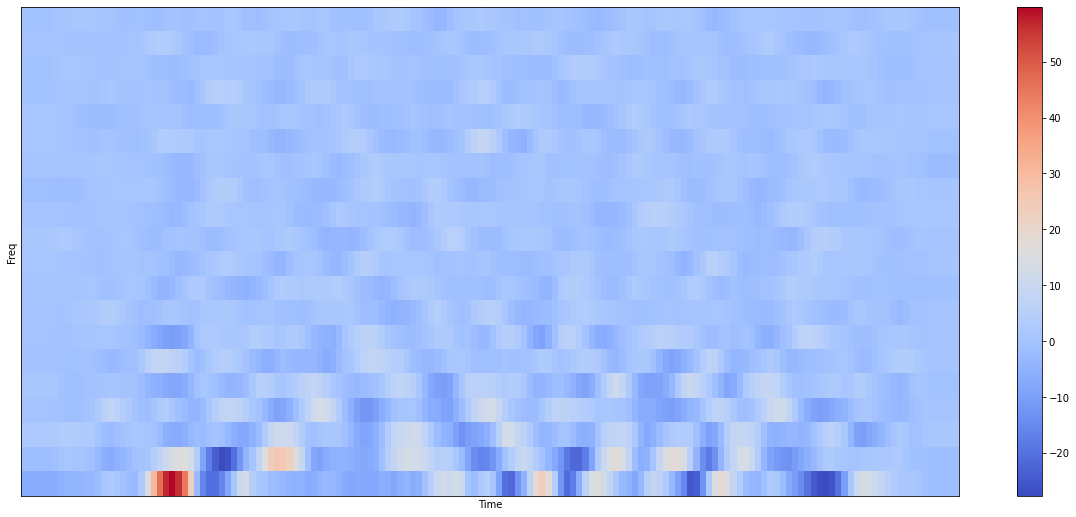

In [15]:
plt.figure(figsize=(21,9))
librosa.display.specshow(delta_mfcc)
plt.xlabel("Time")
plt.ylabel("Freq")
plt.colorbar()
plt.show()